In [2]:
import numpy as np
import pandas as pd

## Investment statistics

In [39]:
final_dataframe = final_dataframe.drop_duplicates()

In [40]:
final_dataframe.to_csv("datasets/all_countries_investments_2001_2023.csv")

In [41]:
investment_df = pd.read_csv("datasets/all_countries_investments_2001_2023.csv")

In [42]:
investment_df.isna().sum()

Unnamed: 0                                               0
Investee Company Name                                    2
Investee Company Nation                                155
Investee Company TRBC Economic Sector                  142
Investment Date                                          0
Round Number                                             0
Investment Stage                                        12
Firm Investor Name                                       4
Fund Investor Name                                       0
Investor Equity Total\n(USD, Millions)                   0
Disclosed Fund Equity Contribution\n(USD, Millions)      0
Round Equity Total\n(USD, Millions)                      0
Disclosed Debt Contribution\n(USD, Millions)             0
Deal Value\n(USD, Millions)                              0
Deal Rank Value\n(USD, Millions)                         0
investment_year                                          0
dtype: int64

In [43]:
investment_df.describe()

,Unnamed: 0,Round Number,"Investor Equity Total\n(USD, Millions)","Disclosed Fund Equity Contribution\n(USD, Millions)","Round Equity Total\n(USD, Millions)","Disclosed Debt Contribution\n(USD, Millions)","Deal Value\n(USD, Millions)","Deal Rank Value\n(USD, Millions)",investment_year
count,786905.000000,786905.000000,786905.000000,786905.000000,786905.000000,786905.000000,786905.000000,786905.000000,786905.000000
mean,424396.893497,3.077441,6.730695,2.283846,24.188756,1.096624,22.953336,42.354925,2014.458946
std,245139.650119,3.897001,79.949544,48.738719,199.821060,55.807959,412.867882,432.757276,6.897409
min,0.000000,1.000000,-79.500000,-79.500000,-79.500000,0.000000,0.000000,0.000000,2001.000000
25%,215685.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026800,2008.000000
50%,421275.000000,2.000000,0.785400,0.000000,3.000000,0.000000,0.000000,3.535000,2016.000000
75%,635670.000000,4.000000,3.291000,0.000000,13.773000,0.000000,0.000000,15.000000,2021.000000
max,851122.000000,145.000000,37605.000000,18700.000000,37605.000000,12500.014700,66000.000000,66000.000000,2023.000000


In [44]:
print("Total number of investments made globally between 2001-2023: ", len(investment_df["Investee Company Name"]))

Total number of investments made globally between 2001-2023:  786905


Text(0, 0.5, 'Count')

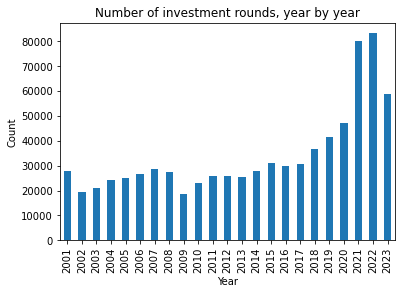

In [45]:
import matplotlib.pyplot as plt
investment_df["investment_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

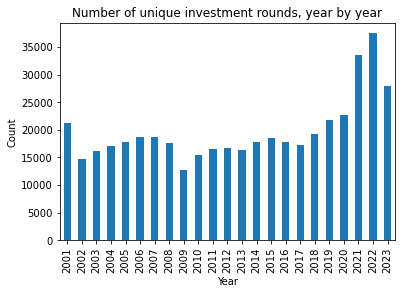

In [46]:
unique_round_df = investment_df.drop_duplicates(subset=investment_df.columns.difference(['Unnamed: 0','Firm Investor Name','Fund Investor Name']))
unique_round_df["investment_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of unique investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [47]:
print("Total number of investment rounds globally between 2001-2023: ", len(unique_round_df))

Total number of investment rounds globally between 2001-2023:  453070


In [48]:
print("Total number of investment firms globally between 2001-2023: ", investment_df["Firm Investor Name"].nunique())

Total number of investment firms globally between 2001-2023:  30096


In [49]:
print("Total number of funds globally between 2001-2023: ", investment_df["Fund Investor Name"].nunique())

Total number of funds globally between 2001-2023:  53616


In [50]:
print("Total investment amound raised -", round(unique_round_df['Deal Rank Value\n(USD, Millions)'].sum()/1000,2), "billion")

Total investment amound raised - 15644.16 billion


Text(0, 0.5, 'Investment Amount (USD, Billions)')

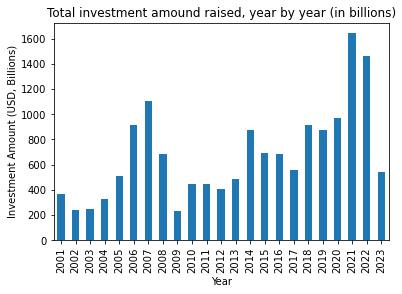

In [51]:
(unique_round_df.groupby("investment_year")['Deal Rank Value\n(USD, Millions)'].sum()/1000).plot(kind="bar")
plt.title("Total investment amound raised, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Billions)")
# plt.ticklabel_format(useOffset÷=False)
# plt.show()

Text(0, 0.5, 'Investment Amount (USD, Billions)')

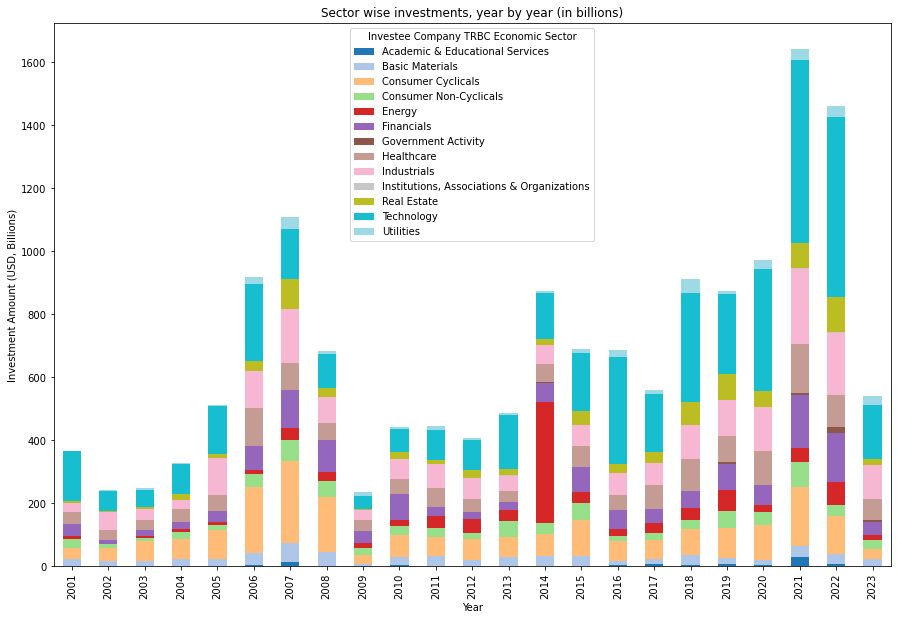

In [52]:
(unique_round_df.groupby(["investment_year","Investee Company TRBC Economic Sector"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Sector wise investments, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Billions)")

Text(0, 0.5, 'Investment Amount (USD, Millions)')

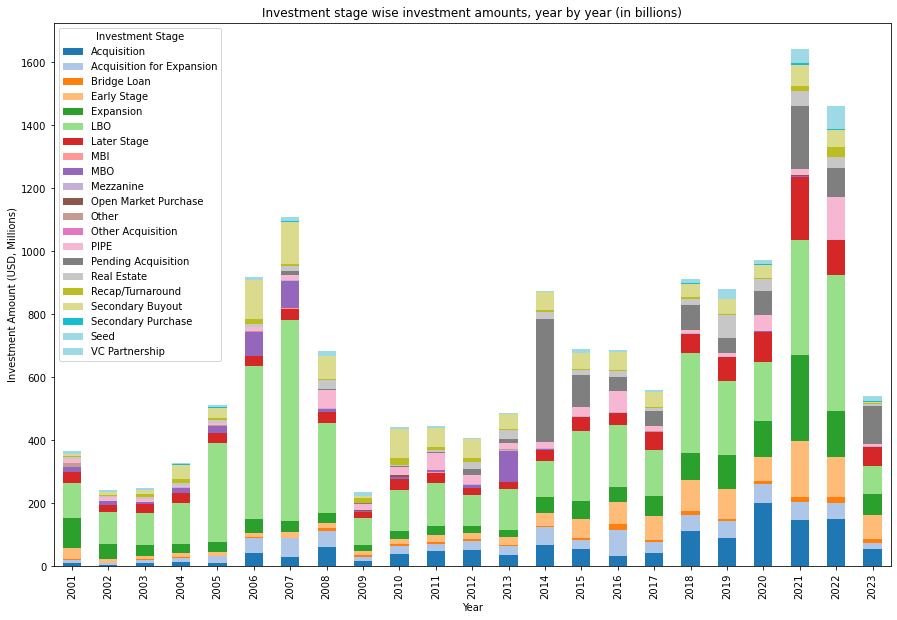

In [53]:
(unique_round_df.groupby(["investment_year","Investment Stage"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Investment stage wise investment amounts, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Millions)")

Text(0, 0.5, 'Count')

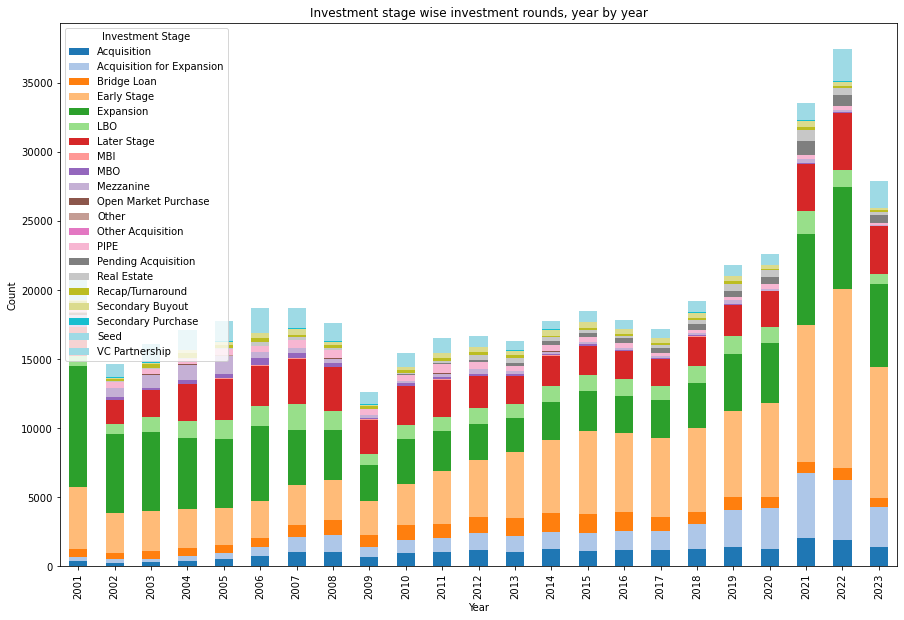

In [54]:
(unique_round_df.groupby(["investment_year","Investment Stage"])['Deal Rank Value\n(USD, Millions)'].count()).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Investment stage wise investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [63]:
list(investment_df)

['Unnamed: 0',
 'Investee Company Name',
 'Investee Company Nation',
 'Investee Company TRBC Economic Sector',
 'Investment Date',
 'Round Number',
 'Investment Stage',
 'Firm Investor Name',
 'Fund Investor Name',
 'Investor Equity Total\n(USD, Millions)',
 'Disclosed Fund Equity Contribution\n(USD, Millions)',
 'Round Equity Total\n(USD, Millions)',
 'Disclosed Debt Contribution\n(USD, Millions)',
 'Deal Value\n(USD, Millions)',
 'Deal Rank Value\n(USD, Millions)',
 'investment_year']

In [93]:
temp = (unique_round_df.groupby(["investment_year","Investee Company Nation"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).reset_index()
temp_largest = temp.groupby(["investment_year"])['Deal Rank Value\n(USD, Millions)'].nlargest(5).reset_index()
temp_largest = pd.merge(temp_largest,temp["Investee Company Nation"], left_on="level_1", right_on=temp.index, how="left")

Text(0, 0.5, 'Investment Amount')

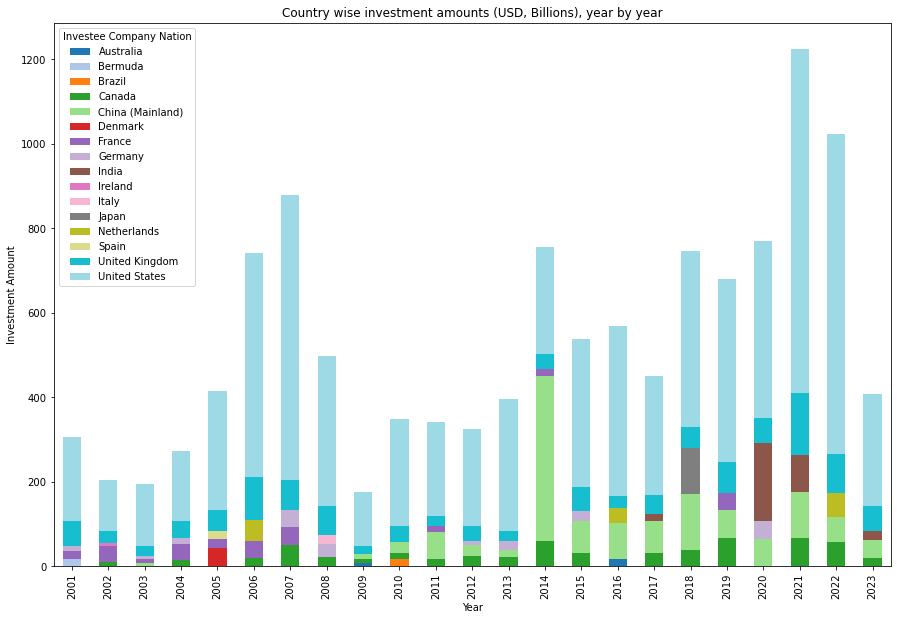

In [96]:
temp_largest.groupby(["investment_year","Investee Company Nation"])['Deal Rank Value\n(USD, Millions)'].sum().unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Country wise investment amounts (USD, Billions), year by year")
plt.xlabel("Year")
plt.ylabel("Investment Amount")

Text(0, 0.5, 'Investment Amount (USD, Millions)')

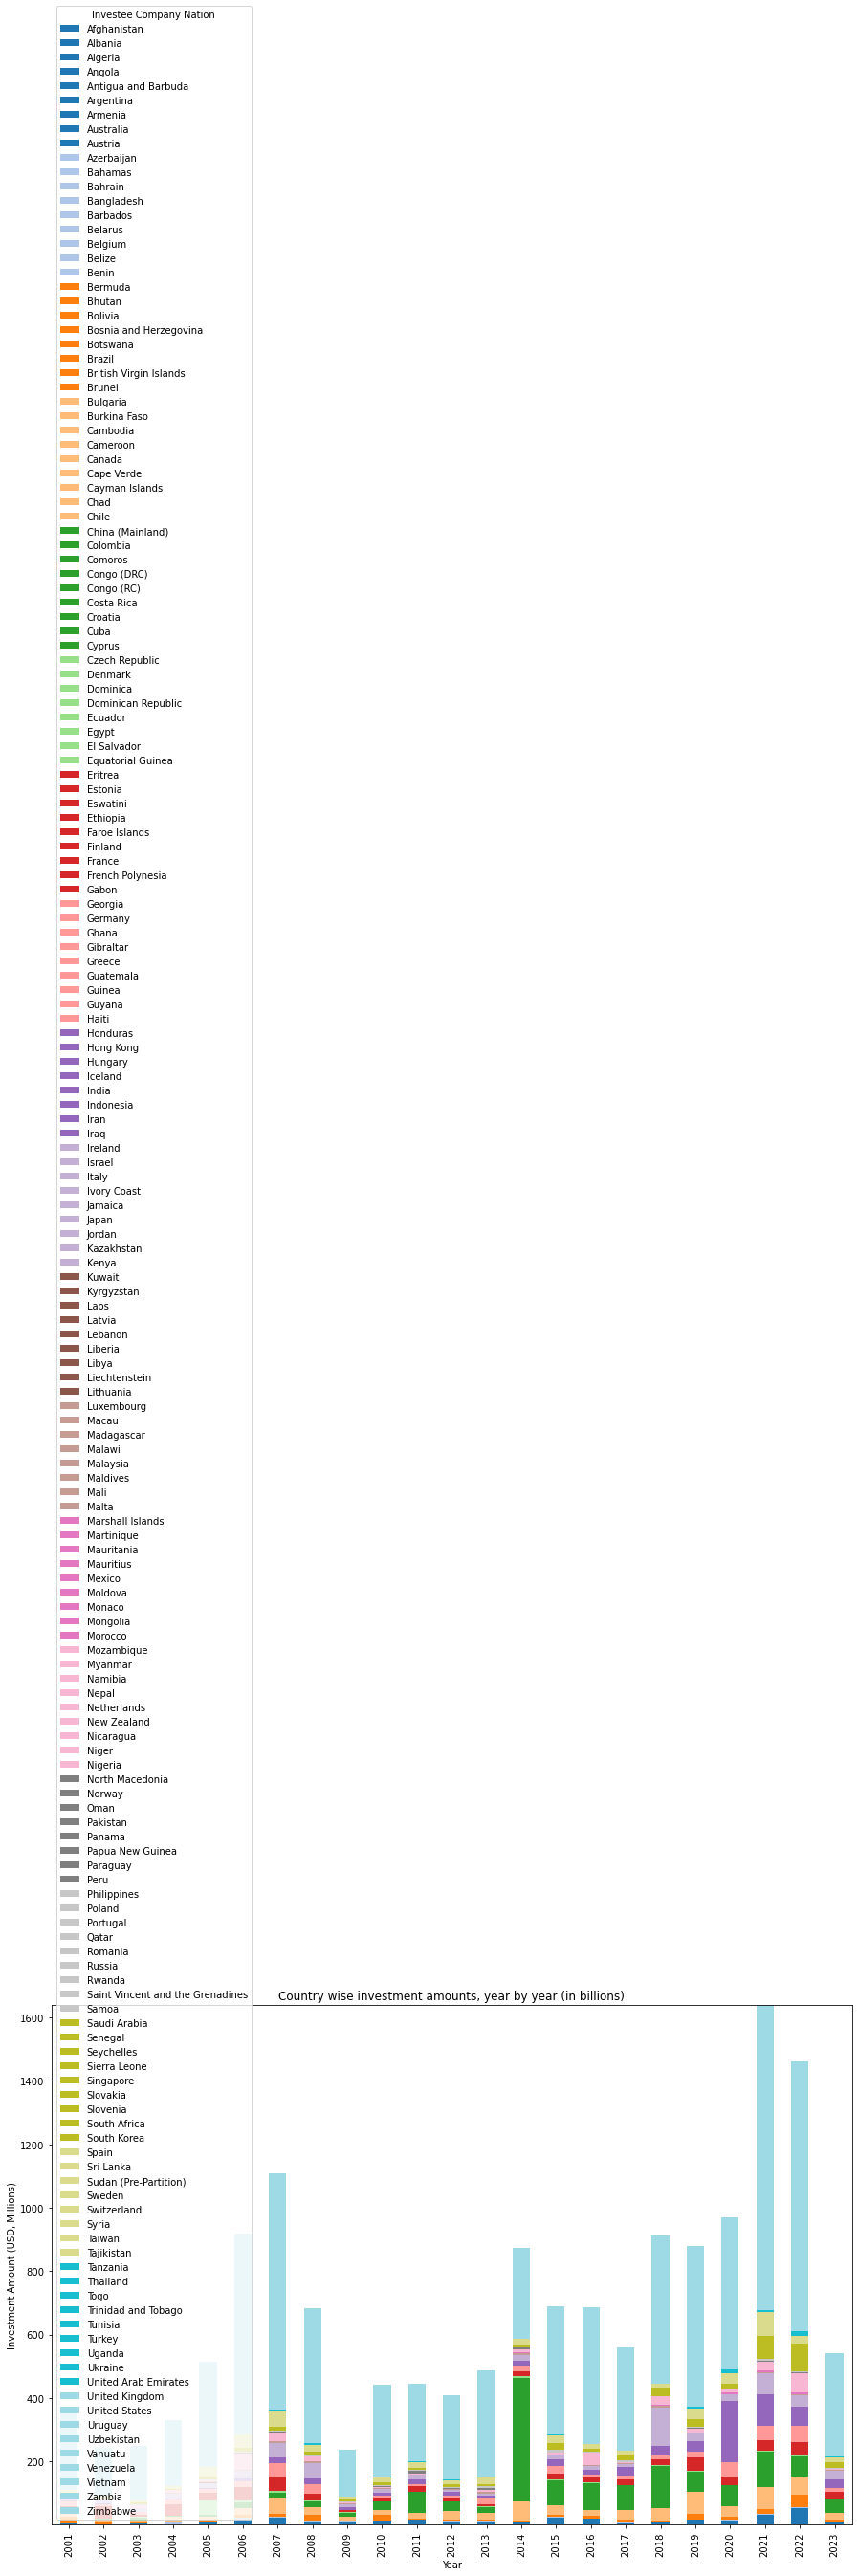

In [64]:
(unique_round_df.groupby(["investment_year","Investee Company Nation"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Country wise investment amounts, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Millions)")

In [100]:
temp = (unique_round_df.groupby(["investment_year","Investee Company Nation"])['Investee Company Name'].count()).reset_index()
temp_largest = temp.groupby(["investment_year"])['Investee Company Name'].nlargest(5).reset_index()
temp_largest = pd.merge(temp_largest,temp["Investee Company Nation"], left_on="level_1", right_on=temp.index, how="left")

Text(0, 0.5, 'Count')

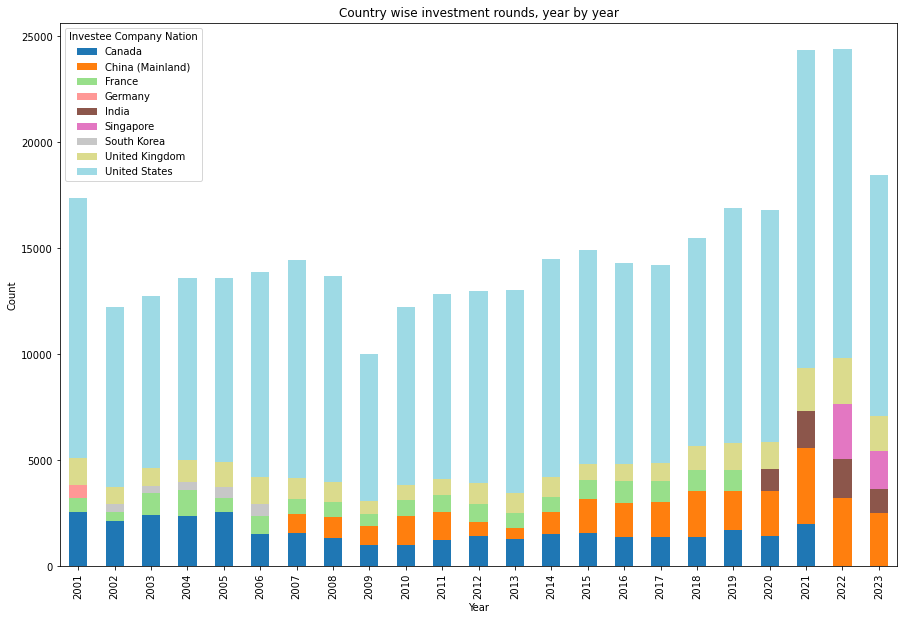

In [101]:
temp_largest.groupby(["investment_year","Investee Company Nation"])['Investee Company Name'].sum().unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Country wise investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [55]:
df = unique_round_df.groupby('Firm Investor Name')['Deal Rank Value\n(USD, Millions)'].sum().reset_index().sort_values(by="Deal Rank Value\n(USD, Millions)", ascending=False)

Text(0.5, 1.0, 'Top 20 Investors and their investment percentages (overall)')

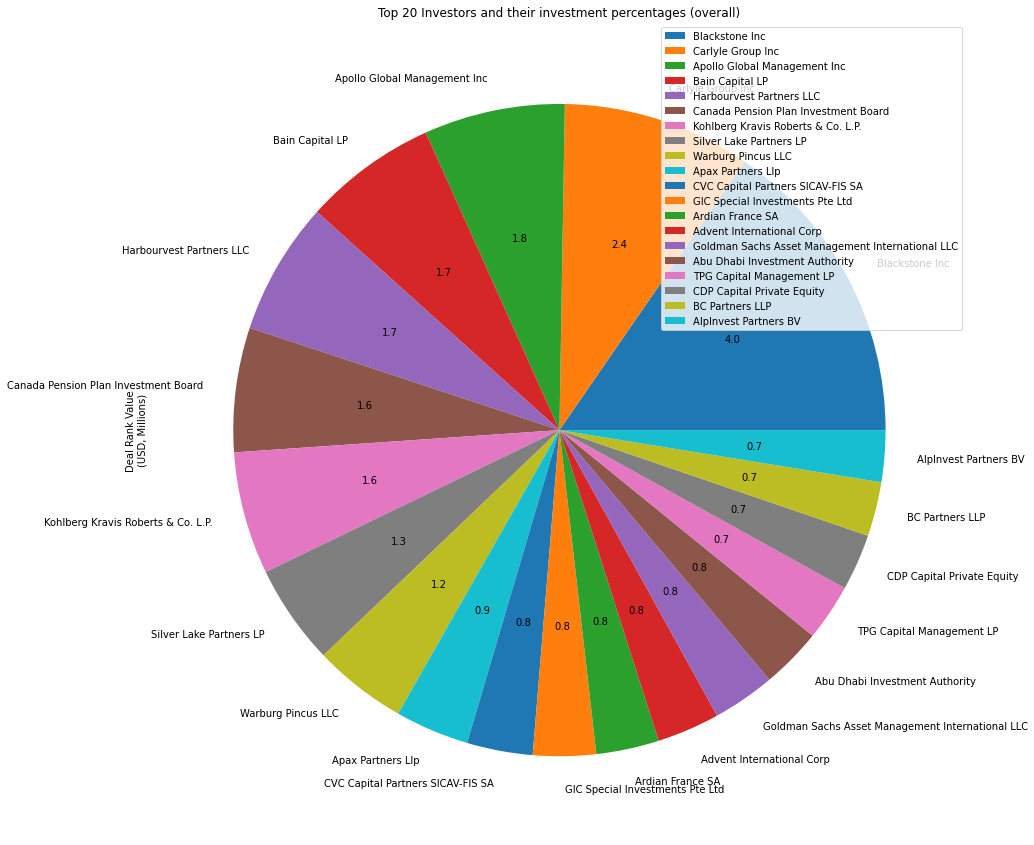

In [56]:
#the top 5
df2 = df[1:21].copy()

# #others
# new_row = pd.DataFrame(data = {
#     'Firm Investor Name' : ['others'],
#     'Deal Rank Value\n(USD, Millions)' : [df['Deal Rank Value\n(USD, Millions)'][50:].sum()]
# })

# #combining top 5 with others
# df2 = pd.concat([df2, new_row])

#plotting -- for comparison left all countries and right 
#the others combined
# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
# df.plot(kind = 'pie', y = 'Deal Rank Value\n(USD, Millions)', labels = df['Firm Investor Name'], ax = axes[0])
df2.plot(kind = 'pie', y = 'Deal Rank Value\n(USD, Millions)', labels = df2['Firm Investor Name'], autopct=lambda x: '{:.01f}'.format(((x/100)*df2['Deal Rank Value\n(USD, Millions)'].sum())/(df['Deal Rank Value\n(USD, Millions)'].sum())*100),figsize=(15,15))
plt.title("Top 20 Investors and their investment percentages (overall)")
# axes[0].set_title('all investors')
# axes[0].set_title('top 20')
# plt.show

Text(0.5, 0, 'Country')

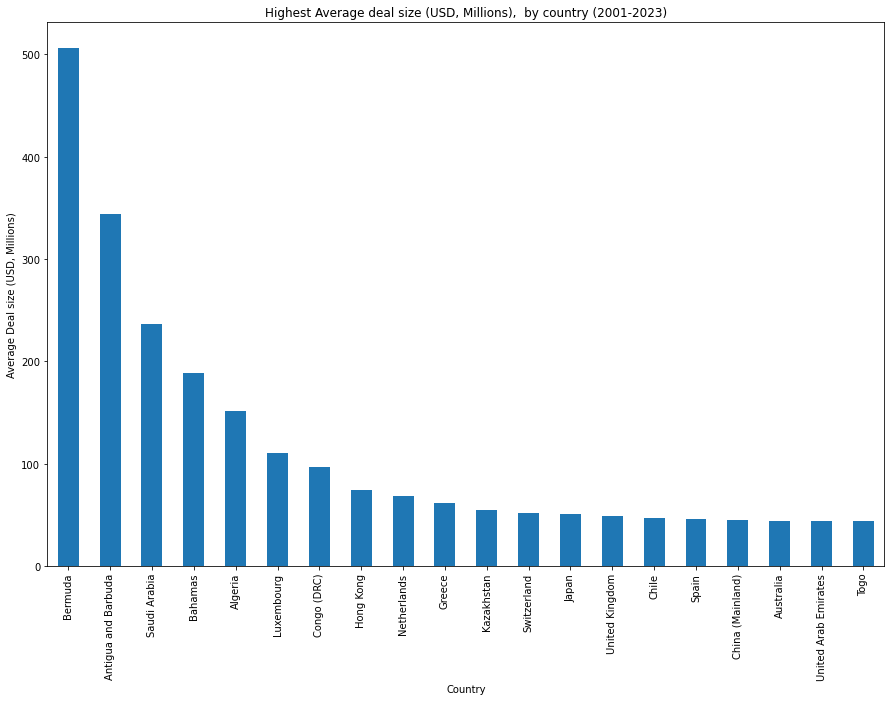

In [172]:
unique_round_df.groupby("Investee Company Nation")['Deal Rank Value\n(USD, Millions)'].mean().nlargest(20).plot(kind="bar",figsize=(15,10))
plt.title("Highest Average deal size (USD, Millions),  by country (2001-2023)")
plt.ylabel("Average Deal size (USD, Millions)")
plt.xlabel("Country")

Text(0, 0.5, 'Count')

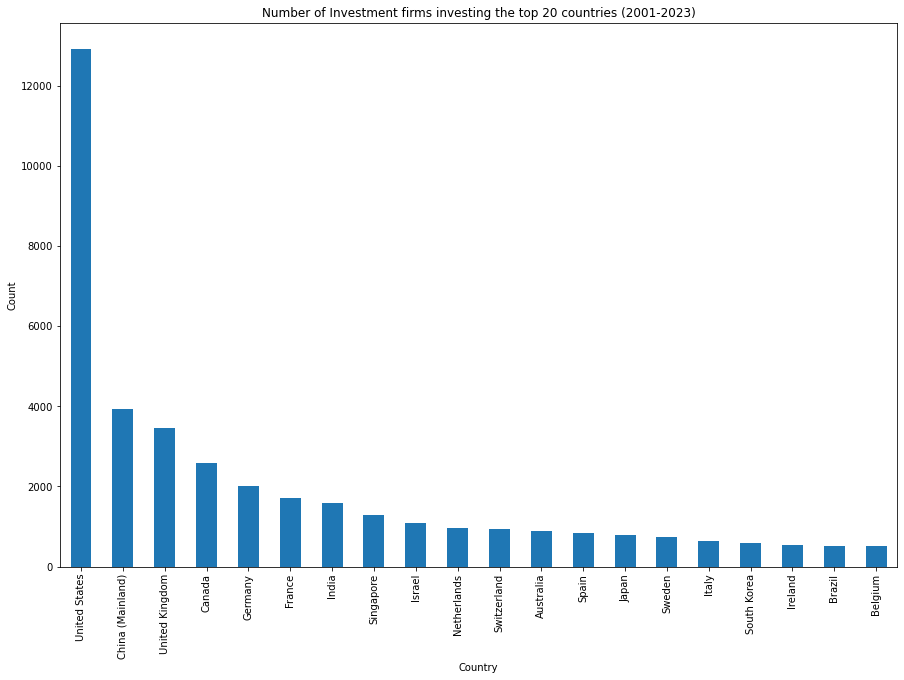

In [173]:
unique_round_df.groupby("Investee Company Nation")["Firm Investor Name"].nunique().nlargest(20).plot(kind="bar",figsize=(15,10))
plt.title("Number of Investment firms investing the top 20 countries (2001-2023)")
plt.xlabel("Country")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

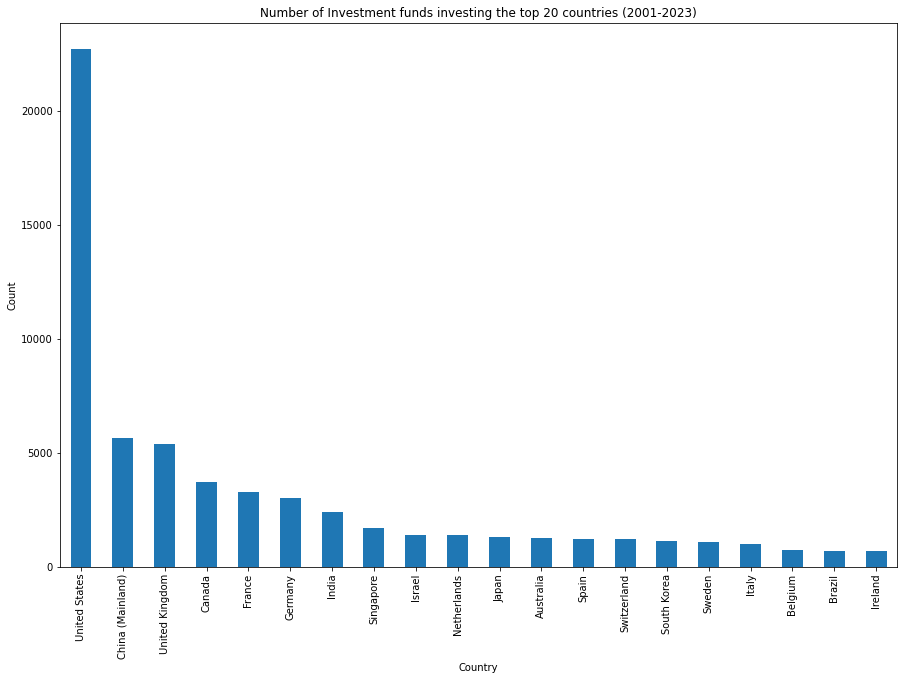

In [174]:
unique_round_df.groupby("Investee Company Nation")["Fund Investor Name"].nunique().nlargest(20).plot(kind="bar",figsize=(15,10))
plt.title("Number of Investment funds investing the top 20 countries (2001-2023)")
plt.xlabel("Country")
plt.ylabel("Count")

Text(0.5, 0, 'Year')

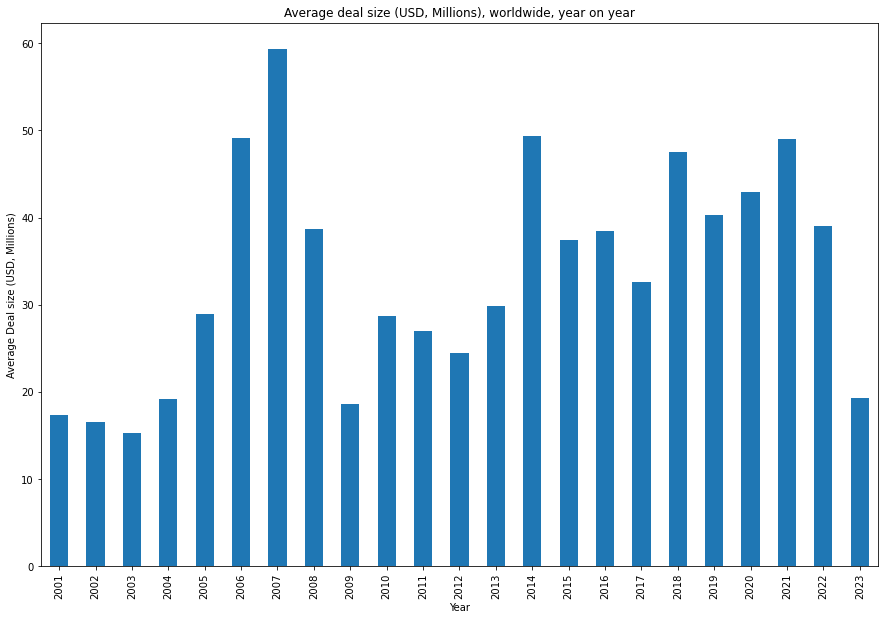

In [170]:
unique_round_df.groupby("investment_year")['Deal Rank Value\n(USD, Millions)'].mean().plot(kind="bar",figsize=(15,10))
plt.title("Average deal size (USD, Millions), worldwide, year on year")
plt.ylabel("Average Deal size (USD, Millions)")
plt.xlabel("Year")

Text(0.5, 0, 'Sector')

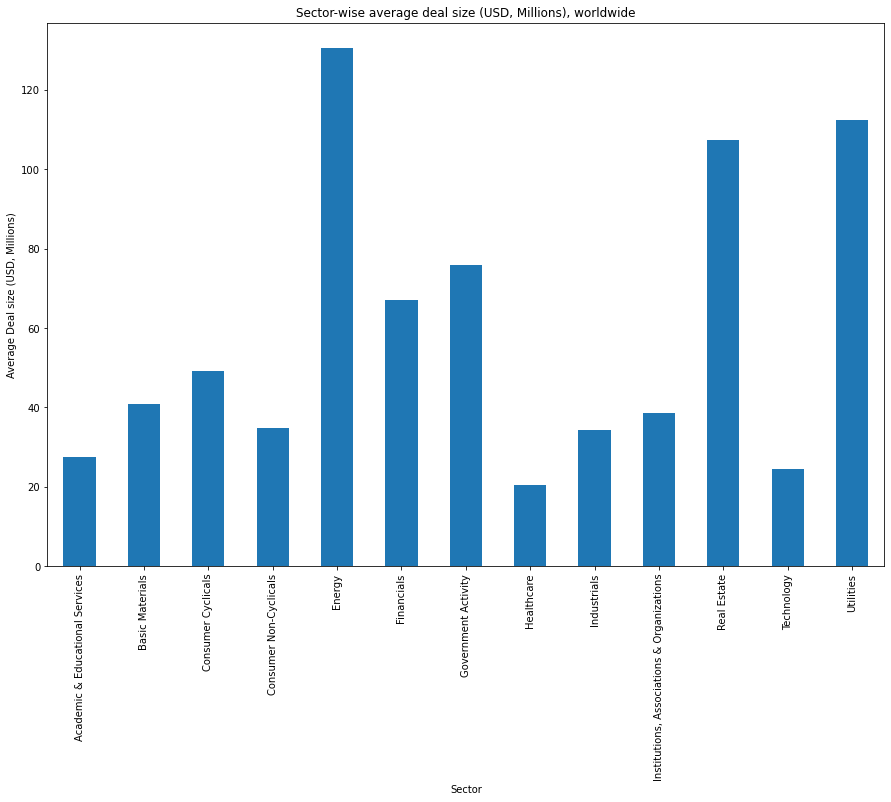

In [175]:
unique_round_df.groupby("Investee Company TRBC Economic Sector")['Deal Rank Value\n(USD, Millions)'].mean().plot(kind="bar",figsize=(15,10))
plt.title("Sector-wise average deal size (USD, Millions), worldwide")
plt.ylabel("Average Deal size (USD, Millions)")
plt.xlabel("Sector")

In [155]:
temp = pd.DataFrame(unique_round_df.groupby("Investee Company Nation")['Deal Rank Value\n(USD, Millions)'].sum().reset_index())

In [162]:
temp_largest = temp.groupby("Investee Company Nation")['Deal Rank Value\n(USD, Millions)'].sum().nlargest(20).reset_index()
temp_largest = pd.merge(temp_largest["Investee Company Nation"],unique_round_df, on="Investee Company Nation", how="inner")

Text(0, 0.5, 'Investment Amount (USD, Billions)')

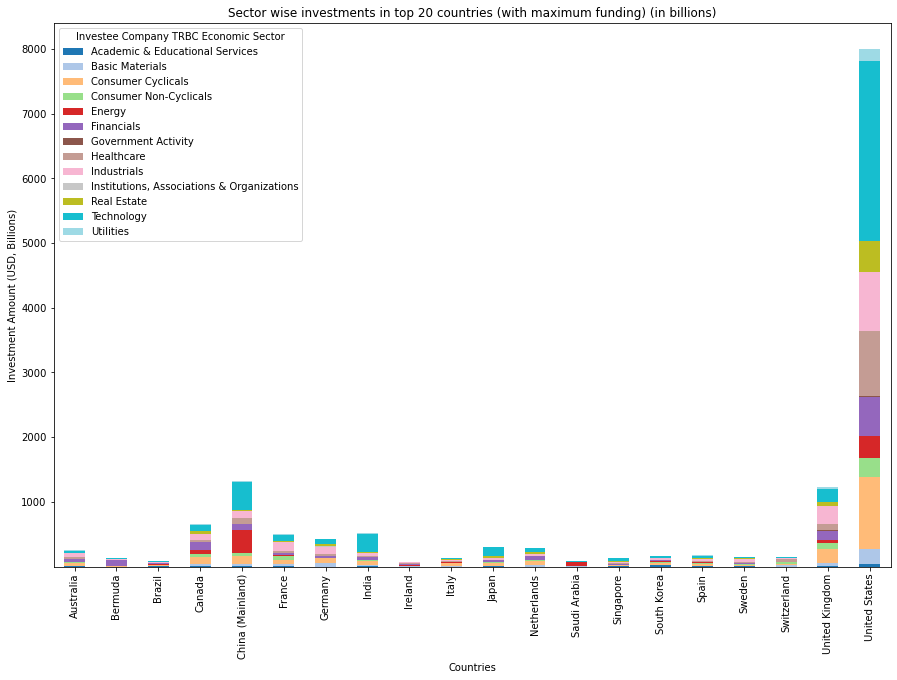

In [165]:
(temp_largest.groupby(["Investee Company Nation","Investee Company TRBC Economic Sector"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Sector wise investments in top 20 countries (with maximum funding) (USD, in billions)")
plt.xlabel("Countries")
plt.ylabel("Investment Amount (USD, Billions)")

Text(0.5, 0, 'Year')

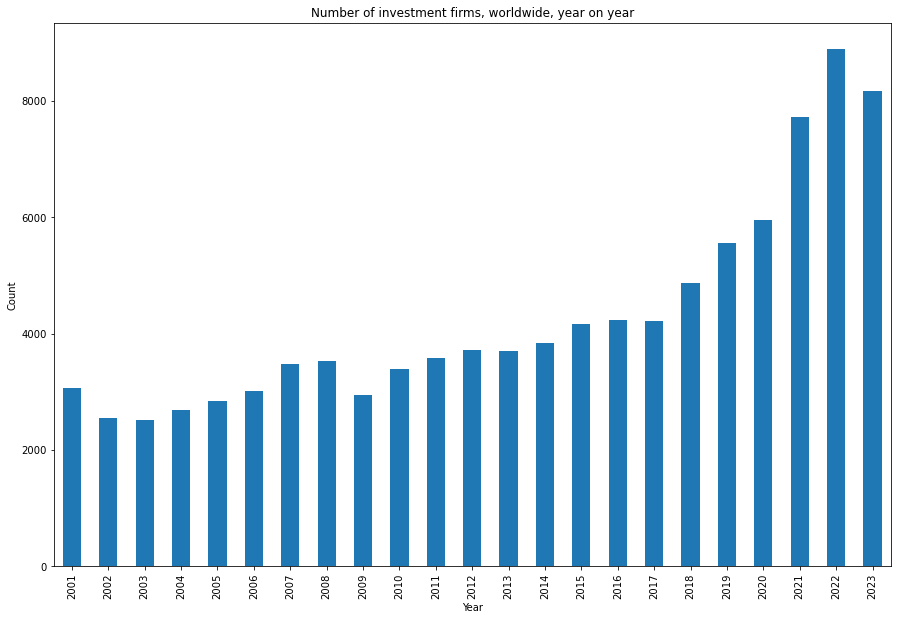

In [176]:
unique_round_df.groupby("investment_year")["Firm Investor Name"].nunique().plot(kind="bar",figsize=(15,10))
plt.title("Number of investment firms, worldwide, year on year")
plt.ylabel("Count")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

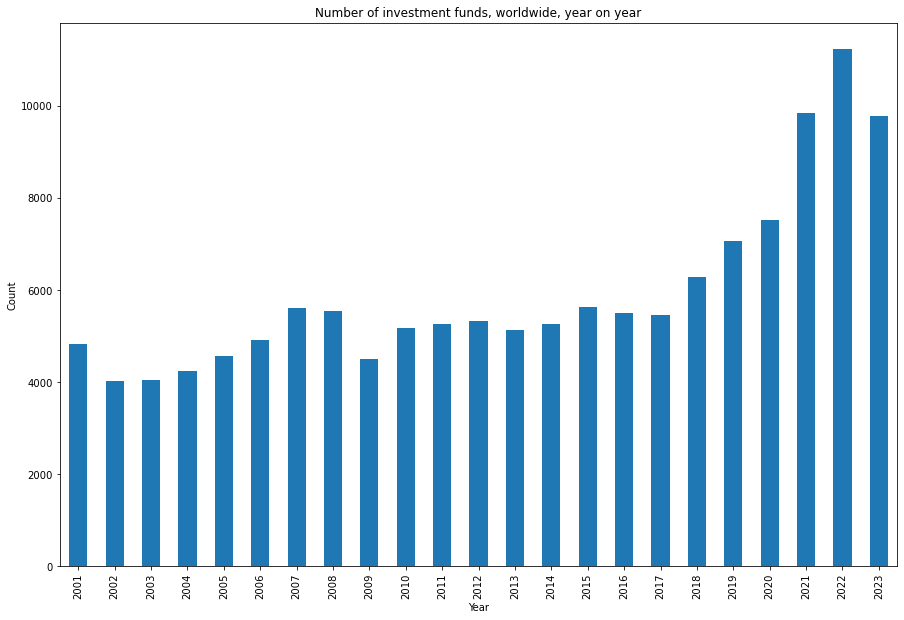

In [177]:
unique_round_df.groupby("investment_year")["Fund Investor Name"].nunique().plot(kind="bar",figsize=(15,10))
plt.title("Number of investment funds, worldwide, year on year")
plt.ylabel("Count")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

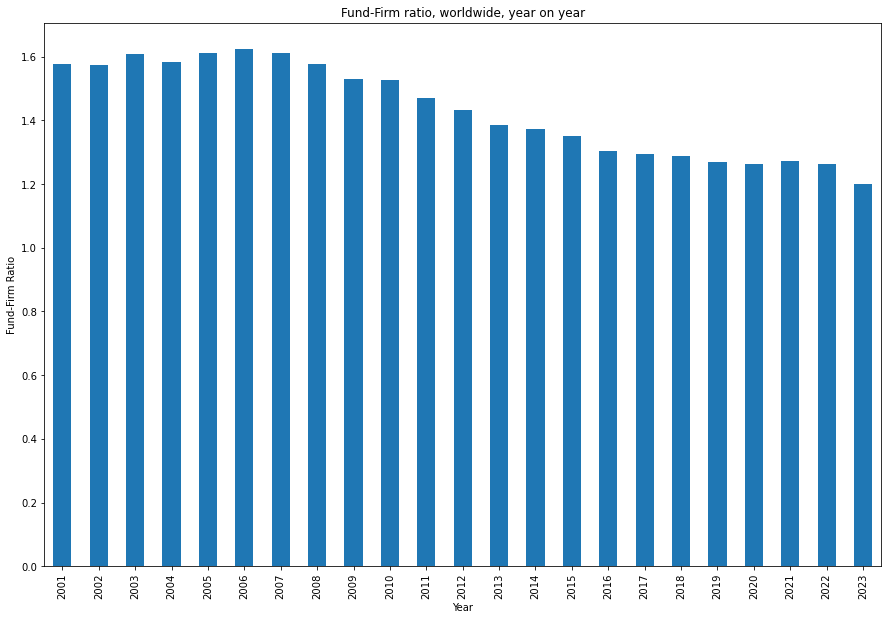

In [180]:
(unique_round_df.groupby("investment_year")["Fund Investor Name"].nunique()/unique_round_df.groupby("investment_year")["Firm Investor Name"].nunique()).plot(kind="bar",figsize=(15,10))
plt.title("Fund-Firm ratio, worldwide, year on year")
plt.ylabel("Fund-Firm Ratio")
plt.xlabel("Year")

In [127]:
temp = pd.DataFrame(unique_round_df.groupby(["investment_year",'Firm Investor Name'])['Deal Rank Value\n(USD, Millions)'].sum().reset_index())

In [128]:
temp_largest = temp.groupby(["investment_year"])['Deal Rank Value\n(USD, Millions)'].nlargest(5).reset_index()
temp_largest = pd.merge(temp_largest,temp["Firm Investor Name"], left_on="level_1", right_on=temp.index, how="left")

In [129]:
temp_largest

,investment_year,level_1,"Deal Rank Value\n(USD, Millions)",Firm Investor Name
0,2001,2863,54374.7947,Undisclosed Firm
1,2001,226,14064.1916,Apax Partners Llp
2,2001,2365,5603.0000,Reed Elsevier Inc
3,2001,1307,5323.9660,Goldman Sachs Asset Management International LLC
4,2001,2353,4541.4920,Rbef Ltd
...,...,...,...,...
110,2023,98234,47839.8811,Undisclosed Firm
111,2023,95258,15300.0000,Japan Industrial Partners Inc
112,2023,94188,15197.5000,GTCR LLC
113,2023,97573,14560.0000,Silver Lake Partners LP


In [130]:
investment_df.drop_duplicates(subset=["Firm Investor Name","Investee Company Name"]).groupby("Firm Investor Name").count()["Investee Company Name"].sort_values(ascending=False).head(50)

Firm Investor Name
Undisclosed Firm                                    82608
Business Development Bank of Canada                  4626
Sequoia Capital Operations LLC                       1682
Y Combinator Management LLC                          1305
Bpifrance Investissement Sas                         1255
Intel Capital Corp                                   1147
Goldman Sachs Asset Management International LLC     1043
New Enterprise Associates Inc                         986
Carlyle Group Inc                                     891
Accel Partners & Co Inc                               881
3i Group PLC                                          873
500 Startups Management Co LLC                        869
Warburg Pincus LLC                                    831
Techstars Central LLC                                 828
Fonds de solidarite des travailleurs du Quebec        742
AH Capital Management LLC                             738
Insight Venture Management LLC                       

In [131]:
investment_df.drop_duplicates(subset=["Fund Investor Name","Investee Company Name"]).groupby("Fund Investor Name").count()["Investee Company Name"].sort_values(ascending=False).head(50)

Fund Investor Name
Undisclosed Fund                                              82485
Growth & Transition Capital                                    3968
Y Combinator Management LLC - Unspecified Fund                 1247
Bpifrance Investissement SAS - Unspecified Fund                 945
Intel Capital - Unspecified Fund                                905
Sequoia Capital - Unspecified Fund                              885
Goldman Sachs Asset Management  - Unspecified Fund              788
Accel Partners & Co Inc - Unspecified Fund                      761
500 Startups Management Company LLC - Unspecified Fund          702
Techstars Central LLC - Unspecified Fund                        684
New Enterprise Associates Inc - Unspecified Fund                664
Tiger Global Management LLC - Unspecified Fund                  663
AH Capital Management LLC - Unspecified Fund                    626
High-Tech Gruenderfonds Management GmbH - Unspecified Fund      607
Bessemer Venture Partners - U

In [62]:
investment_df

,Unnamed: 0,Investee Company Name,Investee Company Nation,Investee Company TRBC Economic Sector,Investment Date,Round Number,Investment Stage,Firm Investor Name,Fund Investor Name,"Investor Equity Total\n(USD, Millions)","Disclosed Fund Equity Contribution\n(USD, Millions)","Round Equity Total\n(USD, Millions)","Disclosed Debt Contribution\n(USD, Millions)","Deal Value\n(USD, Millions)","Deal Rank Value\n(USD, Millions)",investment_year
0,0,07446749 Ltd,United Kingdom,Technology,2016-03-02,3.0,Expansion,Khazanah Nasional Bhd,Khazanah Nasional Berhad - Unspecified Fund,26.9997,0.0,53.9994,0.0,0.000,53.9994,2016
1,1,07446749 Ltd,United Kingdom,Technology,2016-03-02,3.0,Expansion,Qualcomm Ventures,Qualcomm Ventures - Unspecified Fund,26.9997,0.0,53.9994,0.0,0.000,53.9994,2016
2,2,1&1 Internet SE-Business Applications Division,Germany,Technology,2016-11-08,1.0,Pending Acquisition,Warburg Pincus LLC,"Warburg Pincus Private Equity XII, L.P.",0.0000,0.0,0.0000,0.0,495.758,495.7587,2016
3,3,10% Happier Inc,United States,Technology,2016-03-31,2.0,Early Stage,Correlation Management LLC,"Correlation Ventures II, L.P.",0.2000,0.2,3.0000,0.0,0.000,3.0000,2016
4,4,10% Happier Inc,United States,Technology,2016-03-31,2.0,Early Stage,Undisclosed Firm,Undisclosed Fund,2.8000,0.0,3.0000,0.0,0.000,3.0000,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786900,851118,Zyomyx Inc,United States,Healthcare,2010-01-29,10.0,Later Stage,Alloy Ventures Inc,Alloy Ventures - Unspecified Fund,0.1630,0.0,0.1630,0.0,0.000,0.1630,2010
786901,851119,"Zystor Therapeutics, Inc.",United States,Healthcare,2010-01-26,6.0,Bridge Loan,Apjohn Ventures LLC,Apjohn Ventures Fund,0.0000,0.0,0.0000,1.2,0.000,1.2000,2010
786902,851120,"Zystor Therapeutics, Inc.",United States,Healthcare,2010-01-26,6.0,Bridge Loan,PROLOG VENTURES,"Prolog Fund II, L.P.",0.0000,0.0,0.0000,1.2,0.000,1.2000,2010
786903,851121,"Zystor Therapeutics, Inc.",United States,Healthcare,2010-06-25,7.0,Bridge Loan,PROLOG VENTURES,"Prolog Fund II, L.P.",0.0000,0.0,0.0000,0.3,0.000,0.3000,2010


## Company statistics

In [104]:
import os
import pandas as pd

# Define the directory where your dataframes are stored
directory_path = 'datasets/all_data/Company'

# Initialize an empty dataframe to store the combined data
combined_df2 = pd.DataFrame()

# Loop through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx'):  # Assuming your dataframes are in CSV files
        file_path = os.path.join(directory_path, filename)
        print(filename)
        # Load each dataframe and concatenate it to the combined dataframe
        df = pd.read_excel(file_path)
        if (filename.split("_")[0] == "Companies"):
            df["year"] = int(filename.split("_")[1].split(".")[0])
        else:
            df["year"] = int(filename.split("_")[0])
        df.drop(df.index[-1], inplace=True)
        combined_df2 = pd.concat([combined_df2, df], ignore_index=True)
        
        
        
combined_df2.rename(columns = {"Investee Company Nation":"Company Nation","Investee Company Name":"Company Name"}, inplace=True)
combined_df2 = combined_df2.sort_values('year', ascending=False).drop_duplicates('Company Name')
combined_df2.to_csv("datasets/all_countries_unique_companies_processed_2000_2023.csv")

2008_Company.xlsx
Companies_2011.xlsx
2009_Company.xlsx
Companies_2017.xlsx
2003_Company.xlsx
2004_Company.xlsx
Companies_2021.xlsx
Companies_2020.xlsx
2010_Company.xlsx
Companies_2016.xlsx
2005_Company.xlsx
2002_Company.xlsx
Companies_2015.xlsx
Companies_2023.xlsx
Companies_2019.xlsx
2007_Company.xlsx
Companies_2018.xlsx
Companies_2022.xlsx
2006_Company.xlsx
2001_Company.xlsx
Companies_2014.xlsx
Companies_2013.xlsx
Companies_2012.xlsx


In [106]:
companies_df = pd.read_csv("datasets/all_countries_unique_companies_processed_2000_2023.csv")

/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_43623/638831143.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26,27,28,29,32,33,35,36,37,38,39,40,41,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  companies_df = pd.read_csv("datasets/all_countries_unique_companies_processed_2000_2023.csv")


In [107]:
companies_df

,Unnamed: 0.1,Unnamed: 0,Company Name,Company Nation,Investee Company TRBC Economic Sector,Investment Round Permid,Firm Investor BEID,Fund Investor BEID,"Deal Value\n(USD, Millions)","Avg Equity Per Deal in Search Range\n(USD, Millions)",...,Investee Company Zip Code (Branch Office)\n('|'),Investee Company City\n('|'),Investee Company County\n('|'),Investee Company Metropolitan Location\n('|'),Investee Company North American Location\n('|'),Investee Company State/Region\n('|'),Investee Company Street Address\n('|'),Investee Company World Location\n('|'),Investee Company World Sub Location\n('|'),Investee Company Zip Code\n('|')
0,180505,NaN,Shenzhen Keshu Intelligent Technology Co Ltd,China (Mainland),Technology,1.0,1.0,1.0,0.0,0.0,...,NaN,Shenzhen,NaN,Non US,Non-US,Non-US,NaN,Asia,East Asia,NaN
1,183449,NaN,LNC SARL,France,Consumer Cyclicals,1.0,1.0,1.0,0.0,0.0,...,NaN,Paris,NaN,Non US,Non-US,Ile de France,2 Rue de la Paix,Europe,Western Europe,75002
2,183437,NaN,Crystal Grid Technology (Beijing) Co Ltd,China (Mainland),Technology,1.0,1.0,1.0,0.0,0.0,...,NaN,Beijing,NaN,Non US,Non-US,Non-US,NaN,Asia,East Asia,NaN
3,183438,NaN,Suzhou Levostar Biotechnology Co Ltd,China (Mainland),Healthcare,2.0,2.0,2.0,0.0,0.0,...,NaN,Suzhou,NaN,Non US,Non-US,Non-US,"No.328, Xinghu Str, A3-507,Chuangyi Indu-Park",Asia,East Asia,215123
4,183439,NaN,Yuanli (Beijing) Semiconductor Technology Co Ltd,China (Mainland),Technology,1.0,6.0,6.0,0.0,0.0,...,NaN,Beijing,NaN,Non US,Non-US,Non-US,NaN,Asia,East Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181728,275143,88983.0,"EndPoints, Inc.",United States,Technology,2.0,4.0,4.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181729,275140,12967.0,Angiosonics Inc,United States,Healthcare,1.0,2.0,2.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181730,275138,93498.0,"4thpass, Inc.",United States,Technology,1.0,5.0,5.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181731,275137,92828.0,Access CoverageCorp Inc,United States,Financials,1.0,4.0,4.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
print("Average Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().mean())
print("Maximum Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().max())
print("Minimum Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().min())
print("Standard Deviation Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().std())
print("\n")
print("Average Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).mean())
print("Maximum Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).max())
print("Minimum Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).min())
print("Standard Deviation Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).std())

Average Long description length (characters):  437.0982452723281
Maximum Long description length (characters):  2309
Minimum Long description length (characters):  1
Standard Deviation Long description length (characters):  270.9683828359824


Average Long description length (words):  60.34935193710603
Maximum Long description length (words):  337
Minimum Long description length (words):  1
Standard Deviation Long description length (words):  37.61314273803452


In [109]:
print("Number of Unique companies globally that recieved investment between 2001-2023: ", companies_df["Company Name"].nunique())

Number of Unique companies globally that recieved investment between 2001-2023:  181732


In [110]:
print("Average Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().mean())
print("Maximum Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().max())
print("Minimum Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().min())
print("Standard Deviation Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().std())
print("\n")
print("Average Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).mean())
print("Maximum Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).max())
print("Minimum Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).min())
print("Standard Deviation Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).std())

Average Short description length:  53.4892959358901
Maximum Short description length:  75
Minimum Short description length:  1
Standard Deviation Short description length:  14.580173110718334


Average Short description length (words):  7.066989564528202
Maximum Short description length (words):  17
Minimum Short description length (words):  1
Standard Deviation Short description length (words):  2.2408349960835805


Text(0, 0.5, 'Word count')

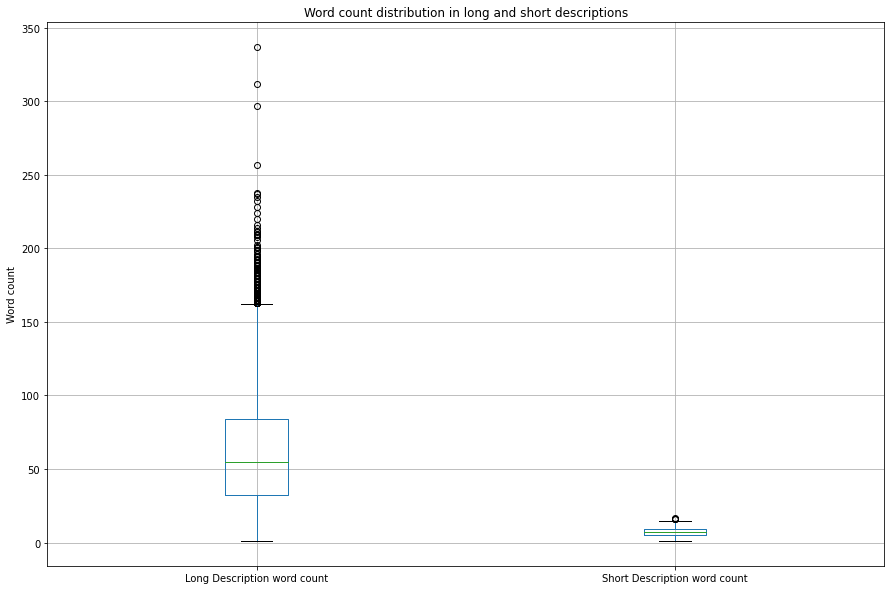

In [112]:
pd.DataFrame({"Long Description word count":companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len),"Short Description word count":companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len)}).boxplot(figsize=(15,10))
plt.title("Word count distribution in long and short descriptions")
plt.ylabel("Word count")

In [113]:
companies_df.isna().sum()

Unnamed: 0.1                                      0
Unnamed: 0                                    64001
Company Name                                      1
Company Nation                                   61
Investee Company TRBC Economic Sector            29
                                              ...  
Investee Company State/Region\n('|')          52550
Investee Company Street Address\n('|')        70282
Investee Company World Location\n('|')        52557
Investee Company World Sub Location\n('|')    52557
Investee Company Zip Code\n('|')              76373
Length: 92, dtype: int64

In [114]:
companies_df.describe()

,Unnamed: 0.1,Unnamed: 0,Investment Round Permid,Firm Investor BEID,Fund Investor BEID,"Deal Value\n(USD, Millions)","Avg Equity Per Deal in Search Range\n(USD, Millions)","Avg Equity Per Firm in Search Range\n(USD, Millions)","Avg Equity Per Fund in Search Range\n(USD, Millions)","Sum of Equity Invested in Search Range\n(USD, Millions)",...,"Deal Rank Value\n(USD, Millions)",Deal Age At Financing In Months\n('|'),Investee Company PermID\n('|'),Investee Company Number Of Employees Most Recent Year End\n('|'),"Disclosed Post Round Company Valuation\n(USD, '|')","Investee Company Total Funding Received To Date\n(USD, '|')",Investee Company Number Of Investments Received To Date\n('|'),Investee Company Number Of Investor Funds To Date\n('|'),Investee Company Number Of Investor Firms To Date\n('|'),year
count,181733.000000,117732.000000,181733.000000,181733.000000,181733.000000,181733.000000,181733.000000,181733.000000,181733.000000,181733.000000,...,181733.000000,116237.000000,1.119990e+05,6.442000e+03,1.177320e+05,1.761510e+05,176151.000000,176151.000000,176151.000000,181733.000000
mean,164209.683195,305884.421797,1.107432,2.133504,2.173628,23.172602,15.641234,9.292352,9.148257,17.150795,...,36.264007,114.745546,7.795480e+09,1.145537e+03,8.442474e+06,3.107788e+07,2.219465,3.475053,3.227004,2015.071891
std,89219.145676,123751.921432,0.417641,1.933252,1.976305,374.144737,167.073921,129.843041,129.283310,177.656498,...,399.511461,240.931230,1.608093e+10,1.485106e+04,4.710451e+08,2.417927e+08,2.438608,3.773538,3.285515,7.010091
min,0.000000,443.000000,1.000000,1.000000,1.000000,0.000000,-27.300000,-27.300000,-27.300000,-54.600000,...,0.000000,-756.000000,4.294976e+09,0.000000e+00,0.000000e+00,-5.460000e+07,1.000000,1.000000,1.000000,2001.000000
25%,86281.000000,192848.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.297259e+09,3.000000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,2009.000000
50%,171067.000000,332000.500000,1.000000,1.000000,1.000000,0.000000,0.150000,0.120000,0.120000,0.160000,...,0.600000,39.000000,5.000698e+09,1.000000e+02,0.000000e+00,1.244000e+06,1.000000,2.000000,2.000000,2017.000000
75%,241434.000000,405430.500000,1.000000,3.000000,3.000000,0.000000,5.000000,2.370000,2.330000,5.270000,...,7.500000,126.000000,5.043338e+09,3.800000e+02,0.000000e+00,1.247990e+07,2.000000,4.000000,4.000000,2022.000000
max,319607.000000,564465.000000,43.000000,41.000000,41.000000,66000.000000,37605.000000,37605.000000,37605.000000,37605.000000,...,66000.000000,23272.000000,9.160446e+10,1.094000e+06,1.250000e+11,3.760500e+10,145.000000,60.000000,60.000000,2023.000000


In [148]:
list(companies_df)

['Unnamed: 0',
 'Company Name',
 'Company Nation',
 'Investee Company TRBC Economic Sector',
 'Avg Equity Per Deal in Search Range\n(USD, Millions)',
 'Avg Equity Per Firm in Search Range\n(USD, Millions)',
 'Avg Equity Per Fund in Search Range\n(USD, Millions)',
 'Sum of Equity Invested in Search Range\n(USD, Millions)',
 "Investee Primary SIC\n('|')",
 "Investee Company Primary VE Industry Sub-Group 2\n('|')",
 "Investee Company Primary VEIC\n('|')",
 "Investee Company TRBC Industry Group\n('|')",
 "Investee Company TRBC Industry\n('|')",
 "Investee Company TRBC Business Sector\n('|')",
 "Investee Company TRBC Activity\n('|')",
 "Investee Company NAICS 2022\n('|')",
 "Investee SIC\n('|')",
 "Investee Company VE Industry Sub-Group 2\n('|')",
 "Investee Company VE Primary Industry Sub-Group 3\n('|')",
 "Investee Company VE Industry Class\n('|')",
 'year',
 'Investment Round Permid',
 'Firm Investor BEID',
 'Fund Investor BEID',
 'Deal Value\n(USD, Millions)',
 'Deal Value\n(USD, Millio

In [115]:
companies_df["founded_year"] = pd.to_datetime(companies_df["Investee Company Founded Date\n('|')"],errors="coerce").dt.year

/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_43623/3223085135.py:1: UserWarning: Parsing '15/10/1897' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  companies_df["founded_year"] = pd.to_datetime(companies_df["Investee Company Founded Date\n('|')"],errors="coerce").dt.year
/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_43623/3223085135.py:1: UserWarning: Parsing '16/11/1872' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  companies_df["founded_year"] = pd.to_datetime(companies_df["Investee Company Founded Date\n('|')"],errors="coerce").dt.year
/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_43623/3223085135.py:1: UserWarning: Parsing '17/11/1894' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  companies_df["founded_year"] = pd.to_datetime(companies_df["Investee Company Founded Date\n('|')"],er

Text(0, 0.5, 'Count')

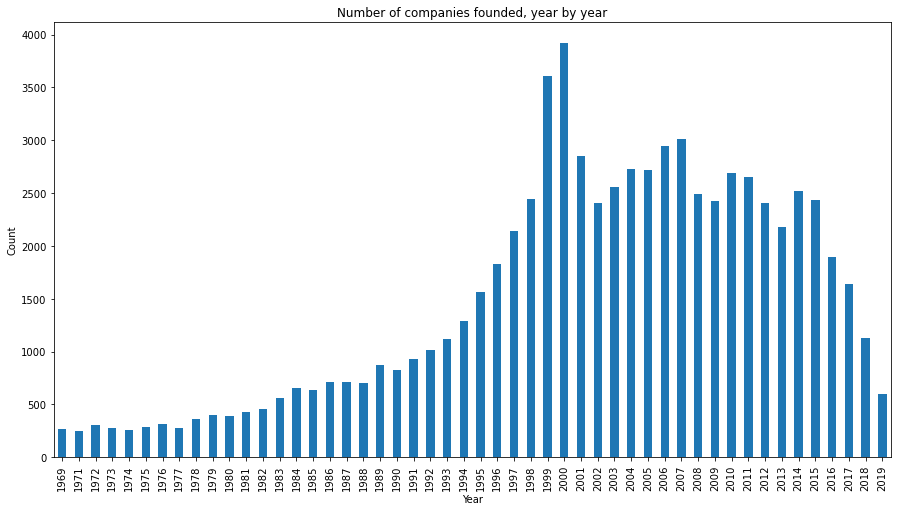

In [116]:
companies_df["founded_year"].dropna().astype(int).value_counts().head(50).sort_index().plot(kind="bar",figsize=(15,8))
plt.title("Number of companies founded, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [198]:
companies_df["founded_year"].isna().sum()

16521

### SIC Classification

988


Text(0.5, 1.0, 'Primary SIC classification')

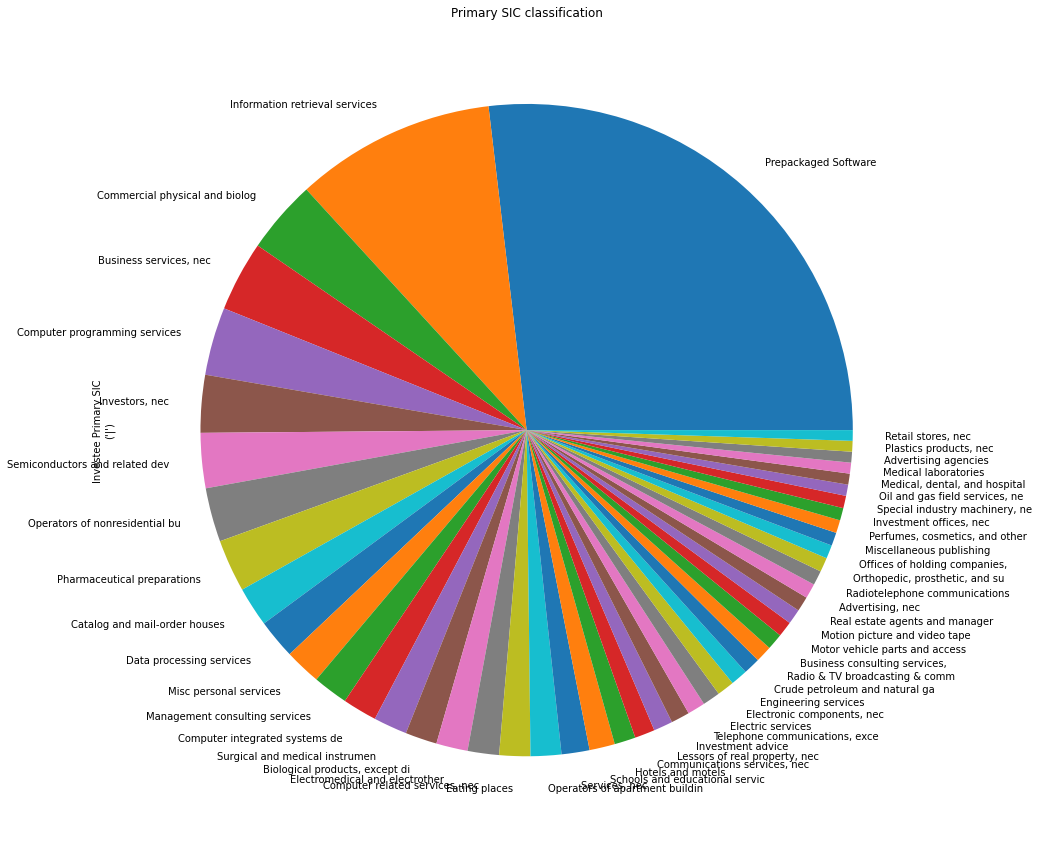

In [117]:
print(companies_df["Investee Primary SIC\n('|')"].nunique())
companies_df["Investee Primary SIC\n('|')"].str.slice(0, 30).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("Primary SIC classification")

988


Text(0.5, 1.0, 'SIC classification')

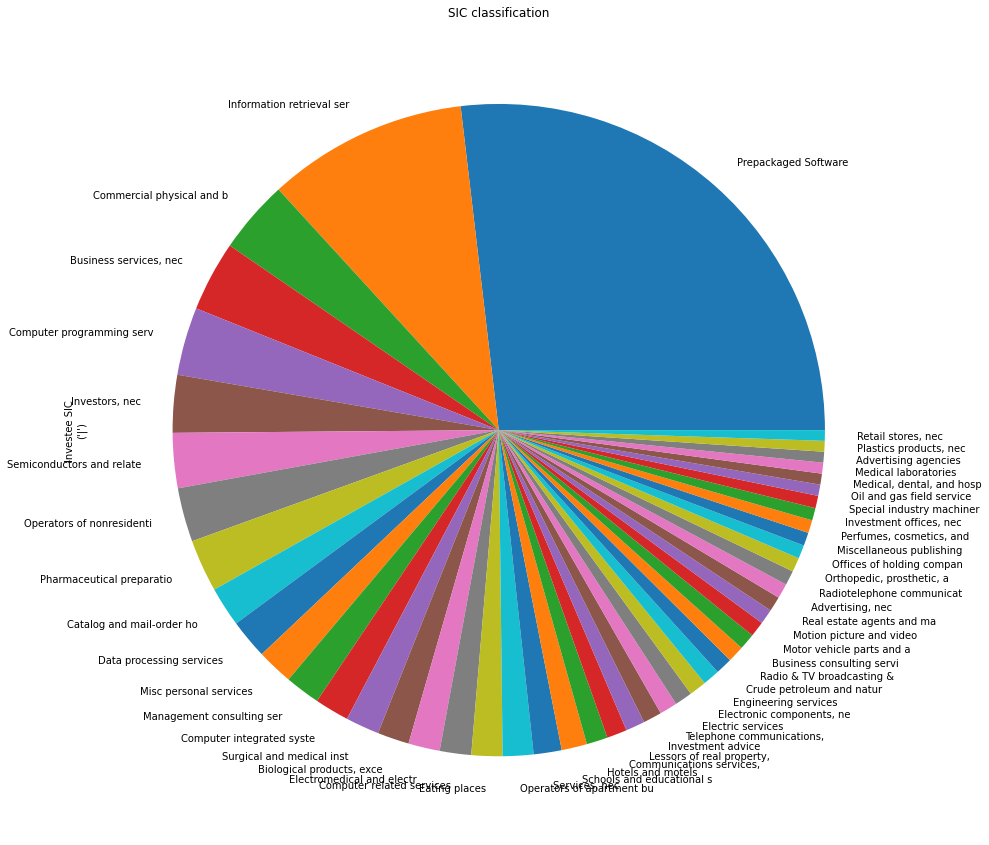

In [118]:
print(companies_df["Investee SIC\n('|')"].nunique())
companies_df["Investee SIC\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("SIC classification")

### VEIC Classification

569


Text(0.5, 1.0, 'Primary Venture Economics(VE) Industry Codes')

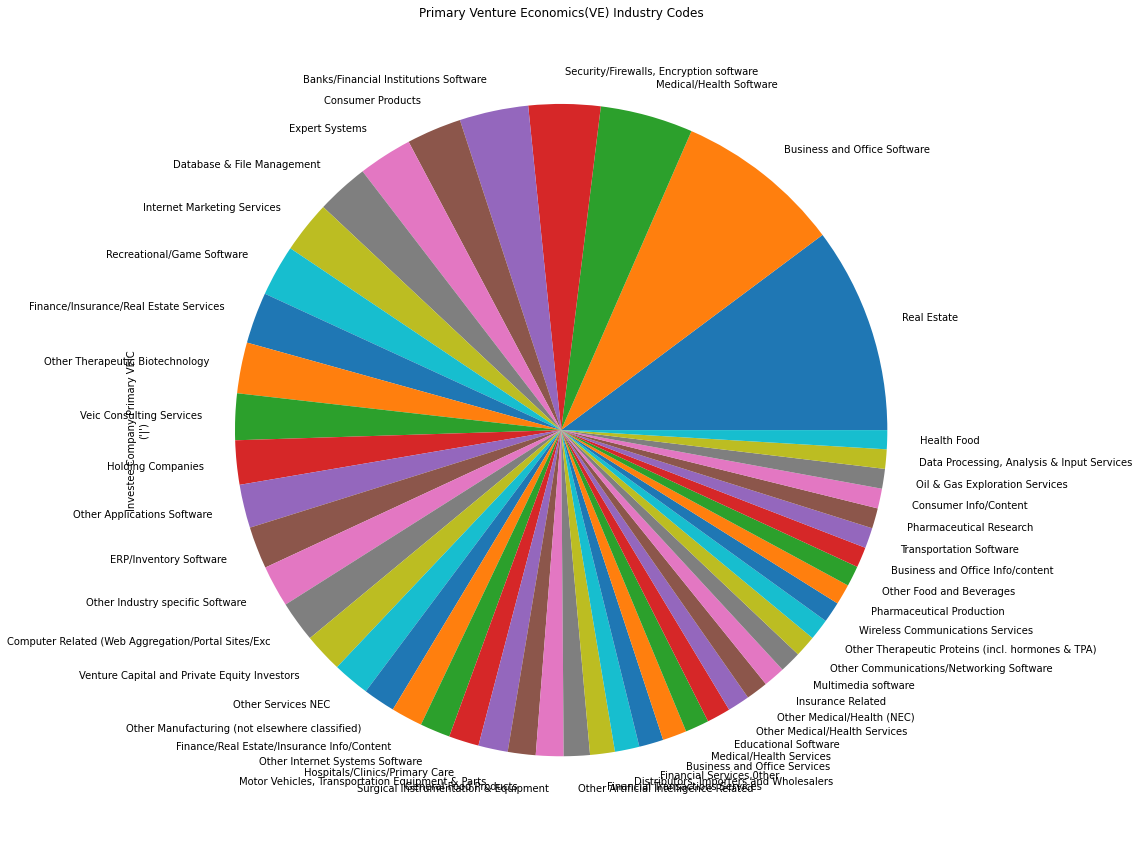

In [114]:
print(companies_df["Investee Company Primary VEIC\n('|')"].nunique())
companies_df["Investee Company Primary VEIC\n('|')"].str.slice(0, 50).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("Primary Venture Economics(VE) Industry Codes")

69


Text(0.5, 1.0, 'Primary Venture Economics(VE) Industry Sub-Group 2')

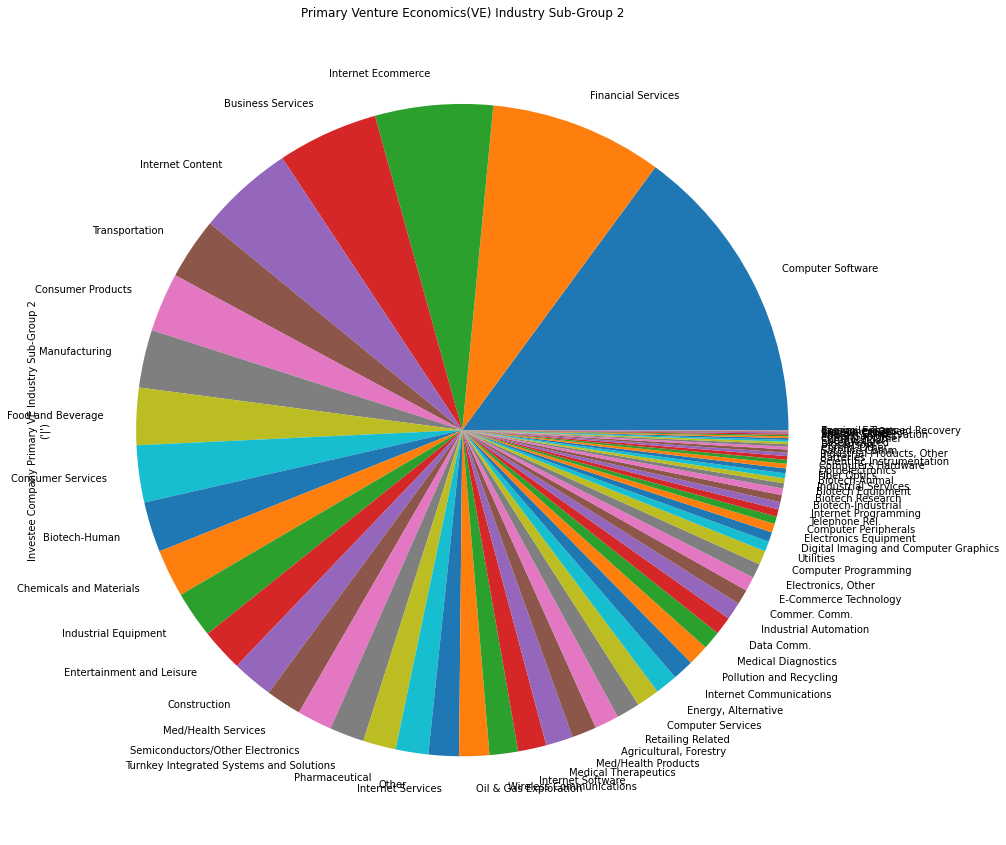

In [119]:
print(companies_df["Investee Company Primary VE Industry Sub-Group 2\n('|')"].nunique())
companies_df["Investee Company Primary VE Industry Sub-Group 2\n('|')"].value_counts().plot(kind="pie",figsize=(15,15))
plt.title("Primary Venture Economics(VE) Industry Sub-Group 2")

588


Text(0.5, 1.0, 'VE Primary Industry Sub-Group 3')

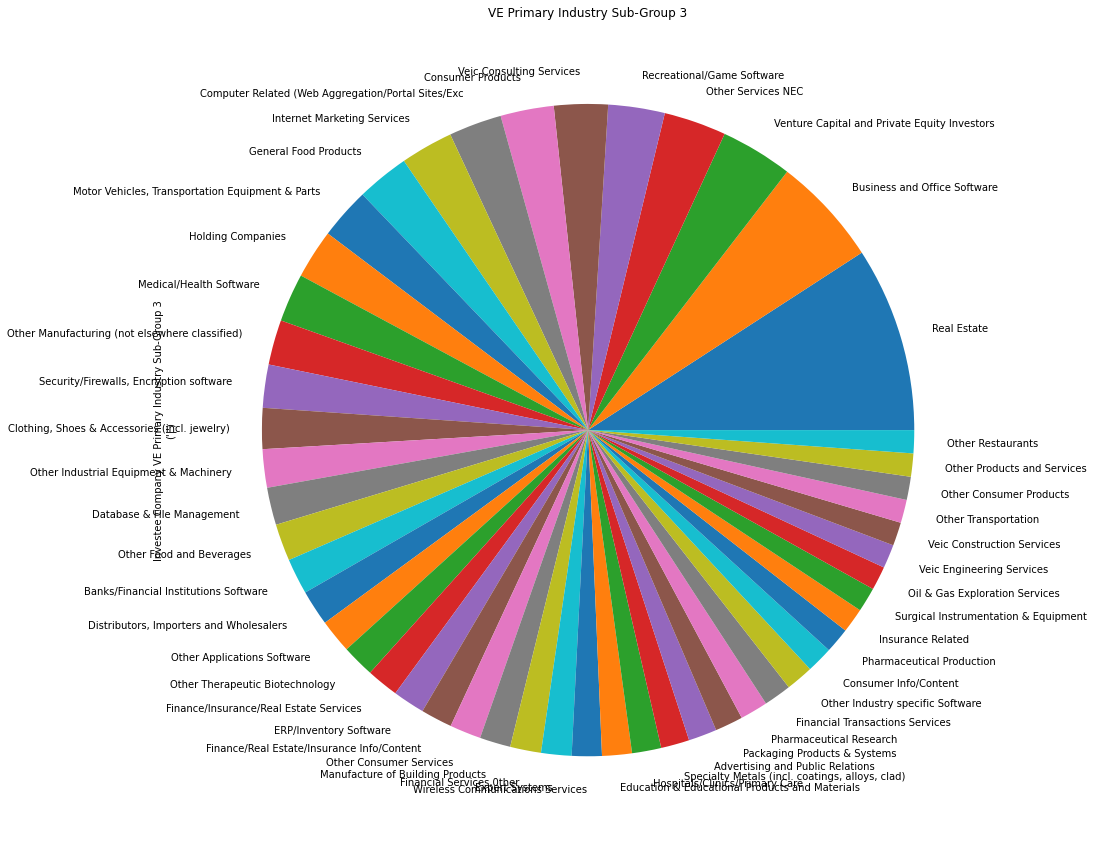

In [120]:
print(companies_df["Investee Company VE Primary Industry Sub-Group 3\n('|')"].nunique())
companies_df["Investee Company VE Primary Industry Sub-Group 3\n('|')"].str.slice(0, 50).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("VE Primary Industry Sub-Group 3")

3


Text(0.5, 1.0, 'VE Industry Class')

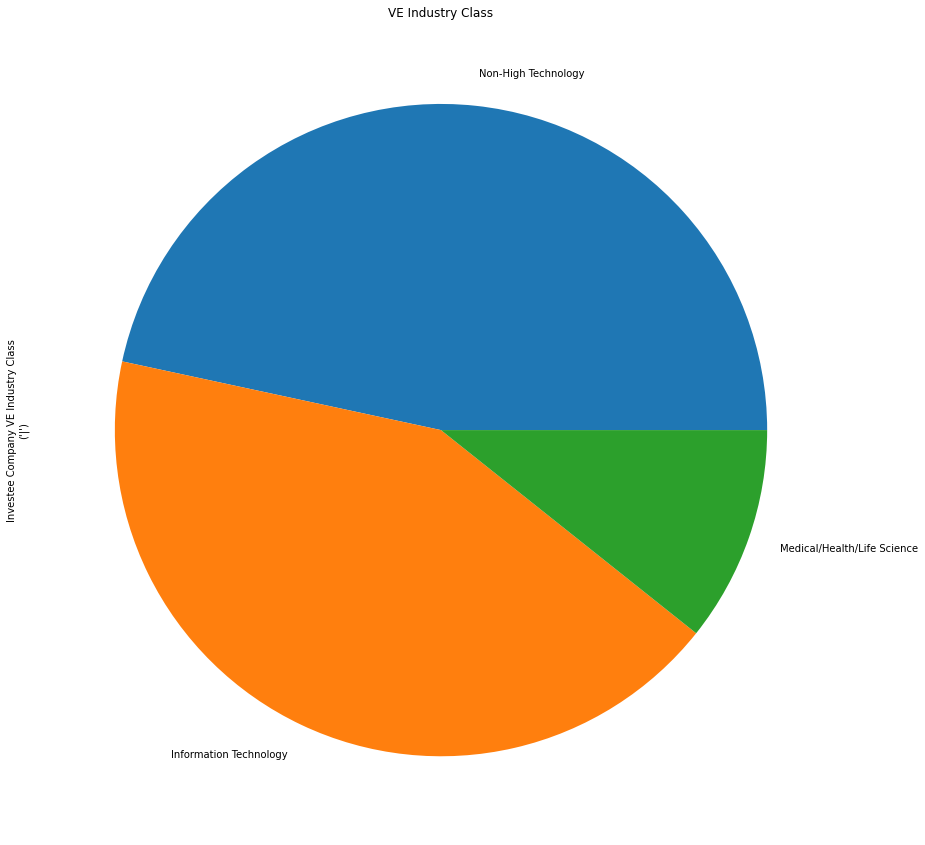

In [121]:
print(companies_df["Investee Company VE Industry Class\n('|')"].nunique())
companies_df["Investee Company VE Industry Class\n('|')"].value_counts().plot(kind="pie",figsize=(15,15))
plt.title("VE Industry Class")

69


Text(0.5, 1.0, 'VE Industry Sub-Group 2')

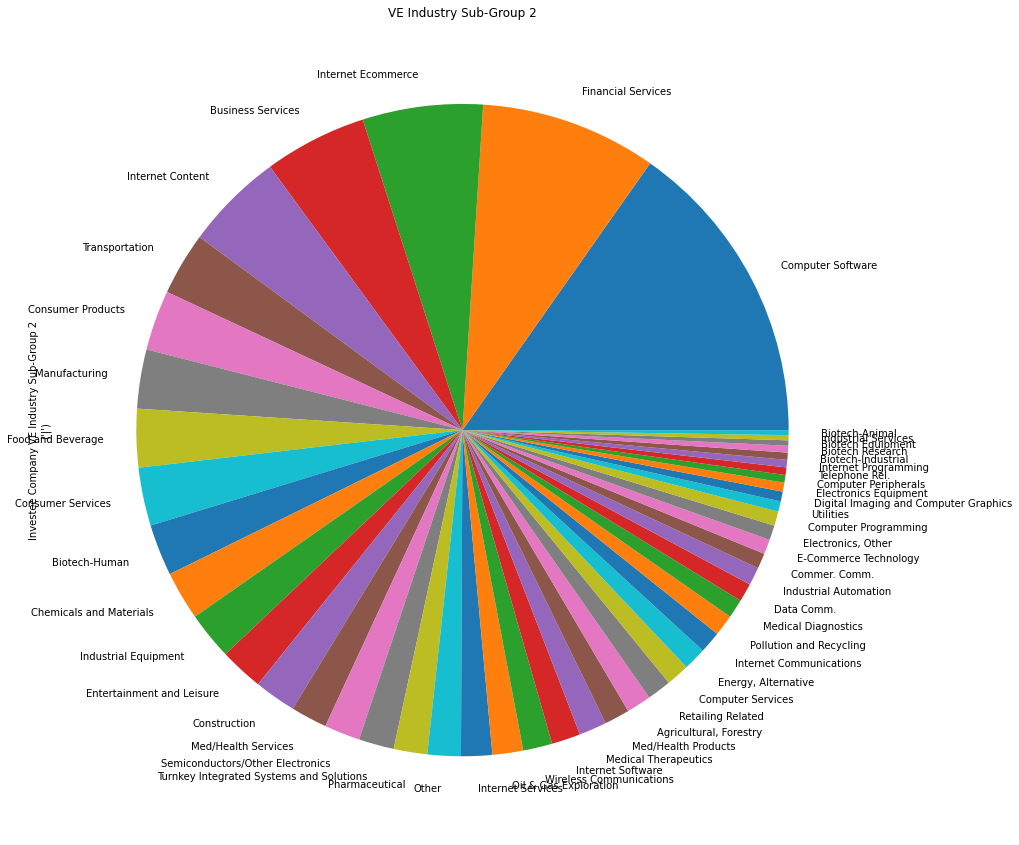

In [122]:
print(companies_df["Investee Company VE Industry Sub-Group 2\n('|')"].nunique())
companies_df["Investee Company VE Industry Sub-Group 2\n('|')"].value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("VE Industry Sub-Group 2")

### TRBC Industry classification

62


Text(0.5, 1.0, 'TRBC Industry Groups')

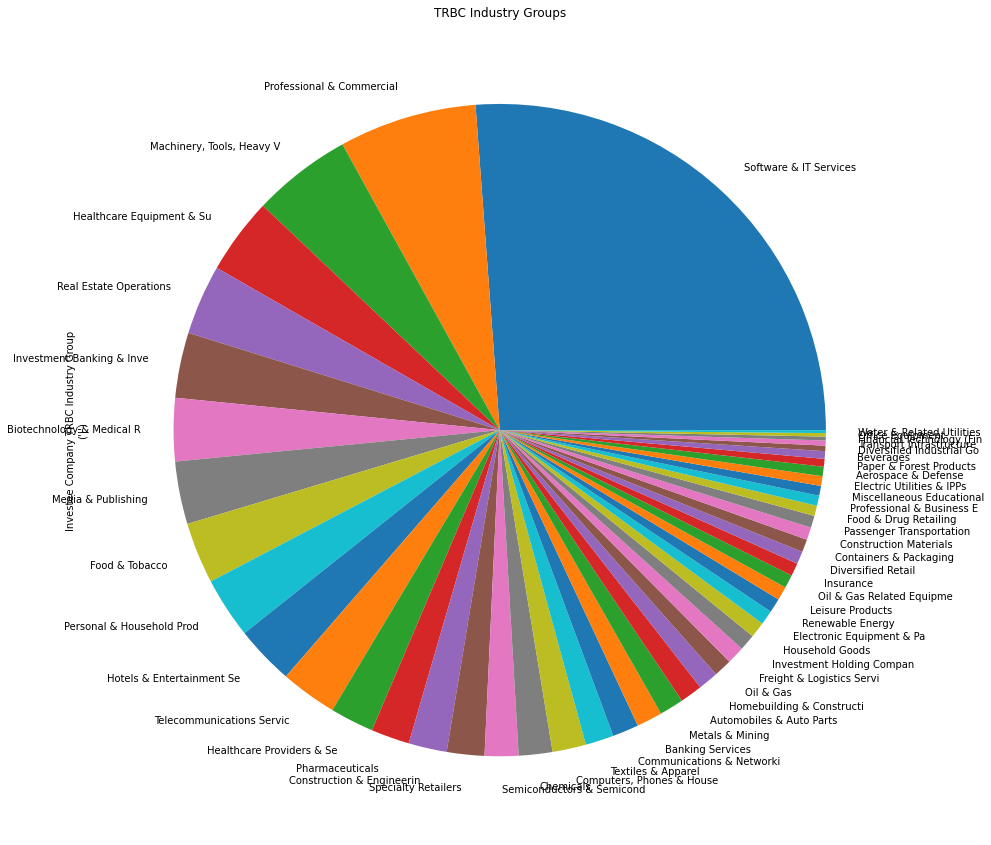

In [123]:
print(companies_df["Investee Company TRBC Industry Group\n('|')"].nunique())
companies_df["Investee Company TRBC Industry Group\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("TRBC Industry Groups")

150


Text(0.5, 1.0, 'TRBC Industry')

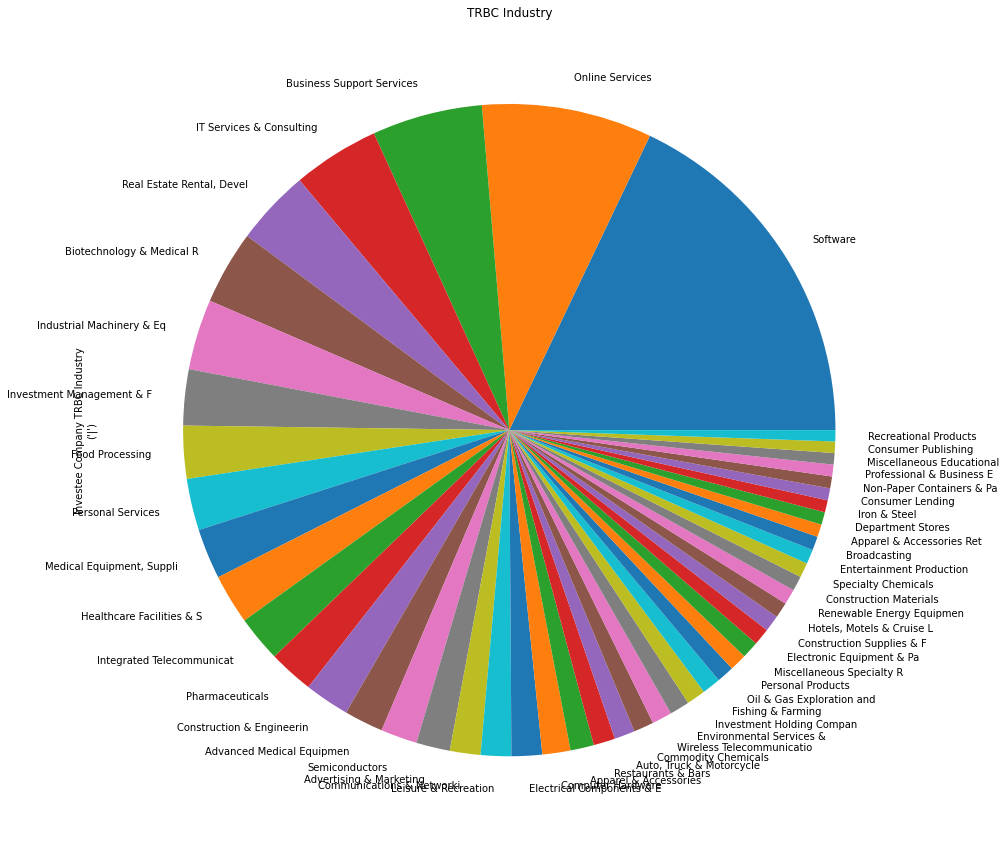

In [124]:
print(companies_df["Investee Company TRBC Industry\n('|')"].nunique())
companies_df["Investee Company TRBC Industry\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("TRBC Industry")

33


Text(0.5, 1.0, 'TRBC Business Sectors')

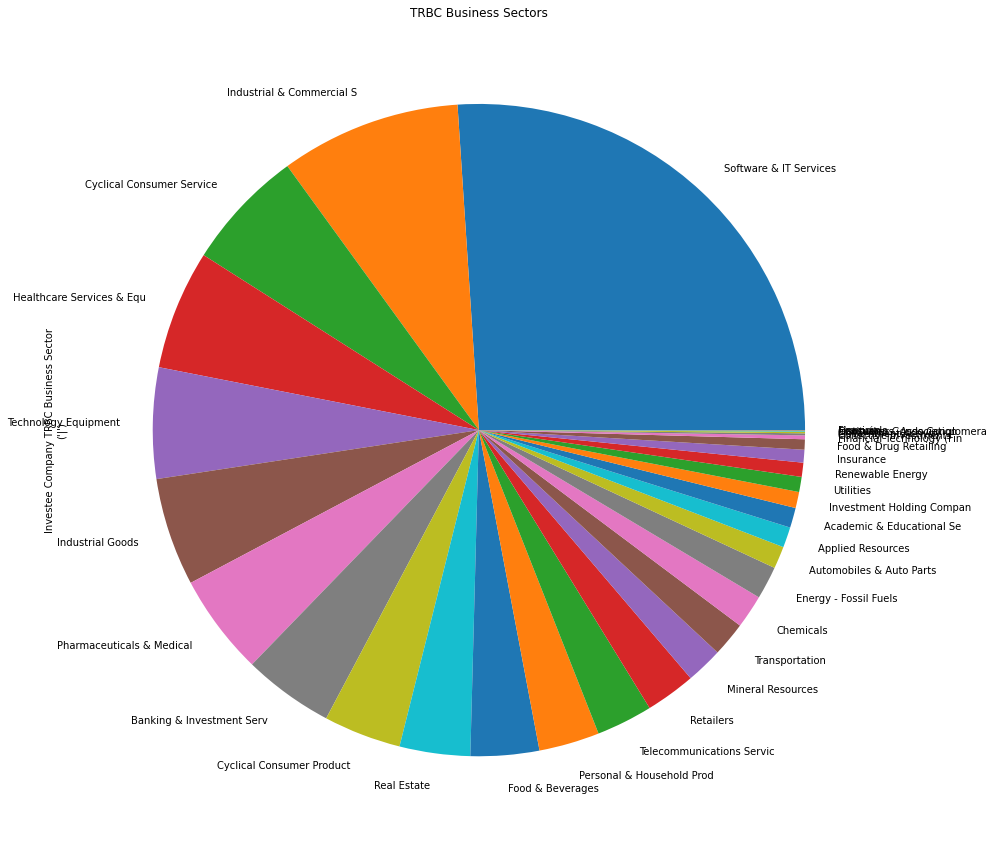

In [125]:
print(companies_df["Investee Company TRBC Business Sector\n('|')"].nunique())
companies_df["Investee Company TRBC Business Sector\n('|')"].str.slice(0, 25).value_counts().plot(kind="pie",figsize=(15,15))
plt.title("TRBC Business Sectors")

### NAICS Classification

995


Text(0.5, 1.0, 'NAICS 2022 classification')

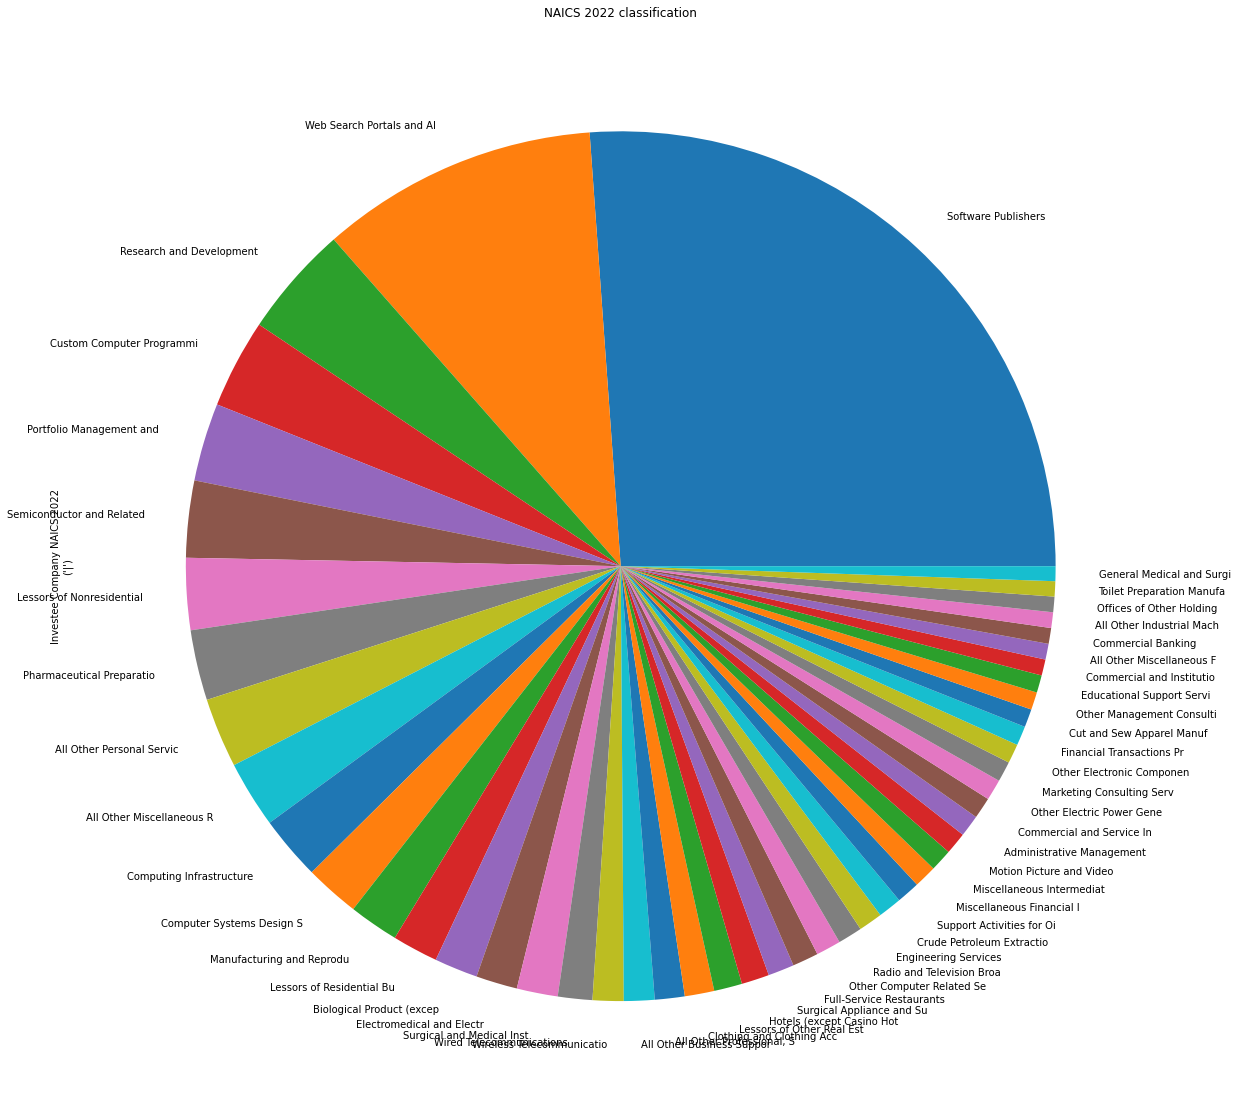

In [126]:
print(companies_df["Investee Company NAICS 2022\n('|')"].nunique())
companies_df["Investee Company NAICS 2022\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(20,20))
plt.title("NAICS 2022 classification")